
<h1 id="Import-libraries-and-define-functions">Import libraries and define functions<a class="anchor-link" href="#Import-libraries-and-define-functions">¶</a></h1>


In [1]:

import numpy as np #numeric library
import matplotlib.pyplot as plt  # plotting library
from scipy.integrate import odeint  # Integrator function
%matplotlib inline



In [2]:

# Prepare a plotting function
def plot_timeseries(s, u, alpha, beta, gamma):
    plt.figure(None, (9,12))
    plt.subplot(611)
    plt.ylabel("alpha")
    try:
        plt.plot(t, [alpha(i) for i in t], label="alpha", c="C3", lw=2)
    except:
        plt.plot(t, np.full(t.shape, alpha), label="alpha", c="C3", lw=2)
    plt.xlim(t.min(), t.max())
    plt.subplot(612)
    plt.ylabel("beta")
    try:
        plt.plot(t, [beta(i) for i in t], label="alpha", c="C2", lw=2)
    except:
        plt.plot(t, np.full(t.shape, beta), label="alpha", c="C2", lw=2)
    plt.xlim(t.min(), t.max())
    plt.subplot(613)
    plt.ylabel("gamma")
    try:
        plt.plot(t, [gamma(i) for i in t], label="gamma", c="C4", lw=2)
    except:
        plt.plot(t, np.full(t.shape, gamma), label="gamma", c="C4", lw=2)
    plt.xlim(t.min(), t.max())
    plt.subplot(614)
    plt.ylabel("unspliced")
    plt.plot(t, u, label="unspliced", c="#2895ae", lw=2)
    plt.xlim(t.min(), t.max())
    plt.subplot(615)
    plt.ylabel("spliced")
    plt.xlabel("t")
    plt.plot(t, s, label="spliced", c="#eea423", lw=2)
    plt.xlim(t.min(), t.max())
    ax1 = plt.subplot(616)
    plt.ylabel("spliced")
    ax1.plot(t, s, label="spliced", c="#eea423", lw=2)
    ax2 = ax1.twinx()
    ax2.plot(t, u, label="unspliced", c="#2895ae", lw=2)
    plt.ylabel("unspliced")
    plt.xlim(t.min(), t.max())




<h1 id="The-model">The model<a class="anchor-link" href="#The-model">¶</a></h1>



<p>RNA metabolism can be modelled as consisting on 3 reactions:</p>
<p>* -&gt; pre-mRNA (transcription)</p>
<p>pre-mRNA -&gt; mRNA (splicing)</p>
<p>mRNA -&gt; * (degradation)</p>



<p>The reactions can be modelled using the law of mass action. The system of differential equations are.</p>
\begin{align}
\dot{u} = \alpha - \beta u \\
\dot{s} = \beta u - \gamma s \\
\end{align}<p>Where we indicate with:</p>
<ul>
<li><em>u</em> - the abundance of unspliced (pre-mRNA) molecules</li>
<li><em>s</em> - the abundance of spliced (mRNA) molecules.</li>
<li><em>alpha</em> - the transcription rate.</li>
<li><em>beta</em> - the splicing rate</li>
<li><em>gamma</em> - the degratation rate of the mRNA</li>
</ul>
<p>Let's now write the differential equations as the following python function.</p>


In [3]:

def diff_equation(y, t, parameters):
    # Let's unpack the variables and parameters vectors (that's how odeint wants the intputs)
    u, s = y
    alpha, beta, gamma = parameters
    # The actual differential equation
    du = alpha - beta * u
    ds = beta * u - gamma * s
    # Pack the differential as a single vector and output (that's how odeint wants the output)
    dy = du, ds
    return dy




<p>We can solve the differential equation numerically using a solver/integrator. Let's first set the simulation time and all parameters and initial condition.</p>


In [4]:

# Prepare all the input required by the solver
t = np.linspace(0, 120, 1000) # a time of 2 hours, divided in 1000 intervals

# fix the parameters
alpha = 4
beta = 0.4
gamma = 0.3
parameters = alpha, beta, gamma

# fix intial conditions
u0 = 0
s0 = 0
y0 = u0, s0




<p>The line above will perform the simulation and return the solution of the integration <em>u</em> and <em>s</em></p>


In [5]:

solution = odeint(diff_equation, y0, t, args=(parameters, ))
u, s = solution.T




<p>We can plot the results of the simulation, simply by:</p>


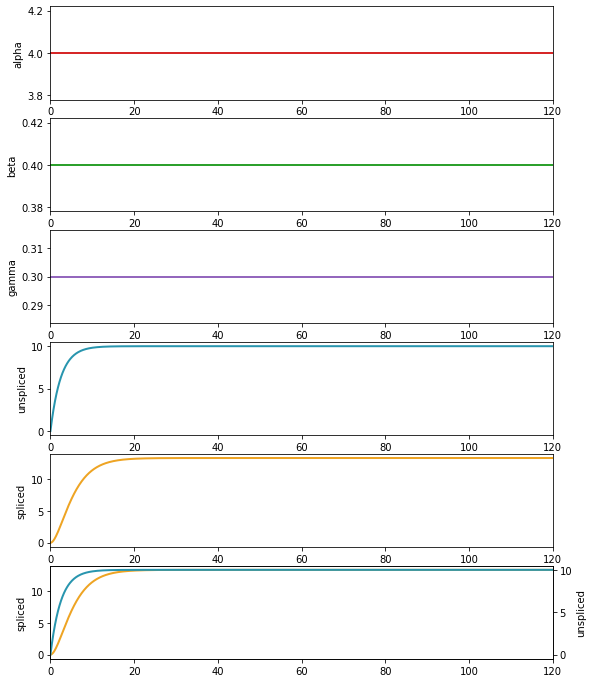

In [6]:

plot_timeseries(s, u, alpha, beta, gamma)




<p><strong>Exercice 1</strong></p>

<p>Try to answer the following questions by:
    1. first looking at the system of differential equations 
    2. Verifing the results running simulations using the ode integrator:</p>
<ul>
Which parameter or set of parameters influences:<br>
a) the steady state of the unspliced RNA  <br>
b) the steady state of the spliced RNA (assume that unspliced RNA is at steady state)<br>
c) the delay between unspliced and spliced (i.e. the difference between the time constants)<br>

</ul>
</li>
</ul>



<p><strong>Exercice 2</strong></p>

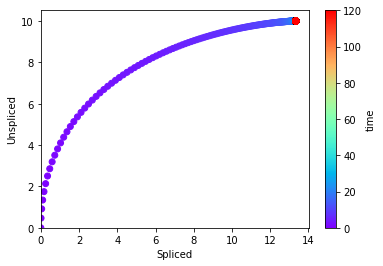

In [7]:

ax = plt.scatter(s,u, c=t, cmap=plt.cm.rainbow)
plt.xlim(0,)
plt.ylim(0,)
plt.xlabel("Spliced")
plt.ylabel("Unspliced")
ax2 = plt.colorbar(ax); ax2.set_label("time")




<p> 1. Notice also that at the last time points, where steady state is aproached and finally reached, the ratio unspliced/spliced has a particular value. This  can be expressed as a particularly simple fucntion of the parameters. What is it?</p>

<p>2. Can this be generalized also in situations when we start from different initial conditions? Try to solve the system above from different initial conditions, to verify your prediction.</p>




<p>Furthermore you could have more complex situation where alpha varies as a function of time:</p>
<p>We are going to write an example when, at the begginning, the gene is off, then it gets turned on, and then after a while again off.
So we can observe a full cycle of upregulation and downregulation.</p>
<p>Feel free to play with the function alpha, beta and gamma, analytic and step functions should both work well with the integrator!</p>


In [8]:

# The change from the code above is just to allow the transcription rate and the other parameters

def alpha(t):
    # This is a step
    if t < 10:
        return 0
    elif t>=10 and t<=60:
        return 4
    else:
        return 0
    
def beta(t):
    # A constant
    return 0.4

def gamma(t):
    # A constant
    return 0.15
    # you couuld try with a periodic function like:
    # return 0.15 * ( np.sin(t/15.) + 1.2 ) 

parameters = alpha, beta, gamma

u0 = 0
s0 = 0
y0 = u0, s0

def diff_equation(y, t, parameters):
    # Let's unpack the variables and parameters vectors
    u, s = y
    alpha, beta, gamma = parameters
    # The actual differential equation
    du = alpha(t) - beta(t) * u
    ds = beta(t) * u - gamma(t) * s
    # Pack the differential as a single vector and output
    dy = du, ds
    return dy



In [9]:

solution = odeint(diff_equation, y0, t, args=(parameters, ))
u, s = solution.T



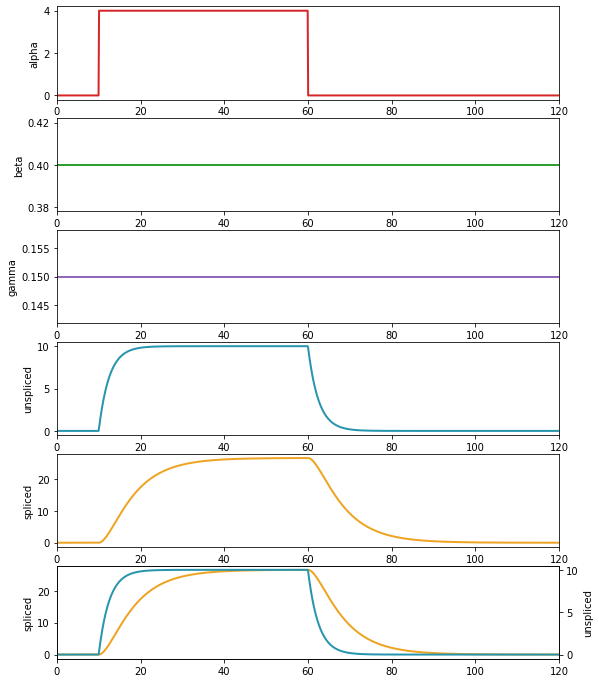

In [10]:

plot_timeseries(s, u, alpha, beta, gamma)



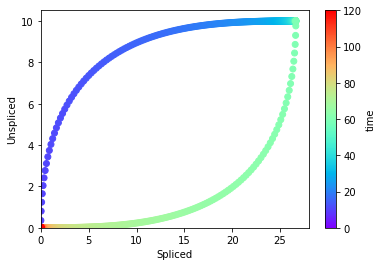

In [11]:

ax = plt.scatter(s,u, c=t, cmap=plt.cm.rainbow)
plt.xlim(0,)
plt.ylim(0,)
plt.xlabel("Spliced")
plt.ylabel("Unspliced")
ax2 = plt.colorbar(ax); ax2.set_label("time")




<h1 id="From-data">From data<a class="anchor-link" href="#From-data">¶</a></h1>


<p><strong>Exercice 3</strong></p>

<p>The level of spliced and unspliced can be directly measured experimentally in many cells.
And the model above offers an opportunity to estimate the RNA velocity</p>
<p>For example even if the biological process we are observing is unsynchronized, and different cells are in a different phase of it, we will be able to make conclusions on whether each cell was upregulating or downregulating a gene.
Let's see how.</p>
<p>We start by generating a fake dataset. First add a little of white noise to the simulation.</p>


In [12]:

s = s + np.random.normal(0,2, size=s.shape)
u = u + np.random.normal(0,1, size=u.shape)



<p>Let's plot the results but from now on, remember that we are assuming that we are working with experimental data.
So we don't know the time from the start of the process for each cell and we don't know the parameters alpha, beta, gamma and how they varied over time.</p>
<p>We can only make use of the spliced and unspliced information form each cell and try to extract the information from there!</p>


Text(0, 0.5, 'Unspliced')

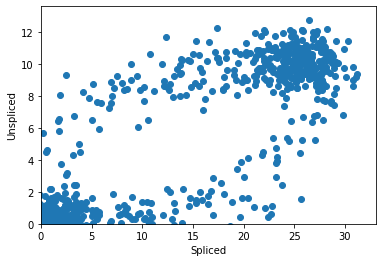

In [13]:

plt.scatter(s,u)
plt.xlim(0,)
plt.ylim(0,)
plt.xlabel("Spliced")
plt.ylabel("Unspliced")




<p>Then let's consider agan the original model.</p>
\begin{align}
\dot{u} = \alpha - \beta u \\
\dot{s}  = \beta u - \gamma s \\
\end{align}<p>We have no good way to estimate alpha from this data, however we can focus on the second equation, and assuming beta = 1 (or analogously writing the equation in units of beta) we get:</p>
\begin{align}
\dot{s}  = u - \gamma s \\
\end{align}<p>Therefore if we could estimate gamma we would be able to calculate the RNA velocity (s prime) of each cell by:</p>
\begin{align}
u - \gamma s \\
\end{align}



<p>Therefore, considering the observation we made in the last question (about where the steady states points sit geometrically), we could try to estimate gamma  (actually gamma / beta but beta=1) from this dataset using a simple linear regression.</p>
<p>Note that we are assuming that there are many cells in steady state (or alternatevelly as many cells upregulating and downregulating the gene), if this is not true the estimation will not work well.</p>


In [14]:

from scipy.optimize import leastsq

# a quick linear regression
def sum_residuals(slope):
    return np.sum((slope*s - u)**2)
gamma_beta = leastsq(sum_residuals, 0)[0][0]



In [15]:

gamma_beta



0.37297317853579237

In [16]:

gamma(0) / beta(0)



0.37499999999999994


<p>Notice how accurately we can estimate gamma / beta in this case!</p>
<p>Then, let's estimate RNA velocity</p>


In [17]:
velocity = u - gamma_beta*s



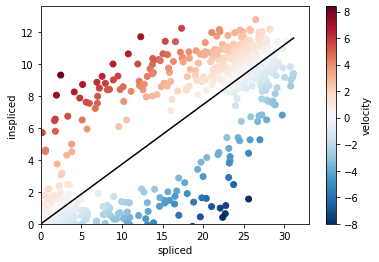

In [18]:

ax = plt.scatter(s,u,c=velocity, cmap = plt.cm.RdBu_r)
xs = np.linspace(0, np.max(s))
plt.plot(xs, gamma_beta * xs, c='k')
plt.xlim(0,); plt.ylim(0,); plt.xlabel("spliced"); plt.ylabel("inspliced")

ax2 = plt.colorbar(ax); ax2.set_label("velocity")




<p>1. Choose one of the data points and extrapolate the gene expression level after 20 minutes?
You can use the following function to plot function on the plot above</p>
<pre><code>plt.arrow(x, y, delta_x, delta_y, head_width=0.5)</code></pre>
<p>2. Is it possible to extrapolate also for u? </p>
<p>3. Which assumption could be made?</p>
